In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error



In [52]:
df = pd.read_csv("insurance.csv")


In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 600x600 with 0 Axes>

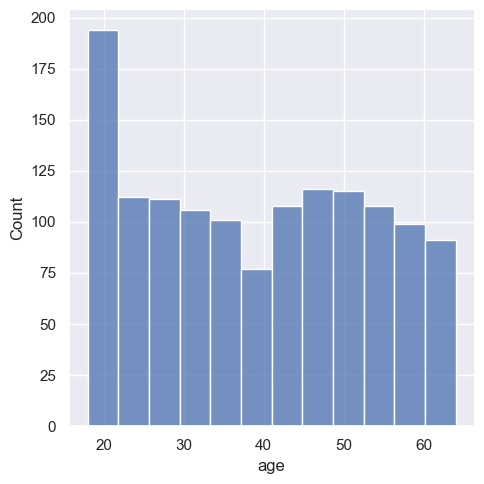

In [54]:
# distrubution for age column

sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.show()


We can see that age 20 are in most numbers

<Axes: xlabel='sex', ylabel='count'>

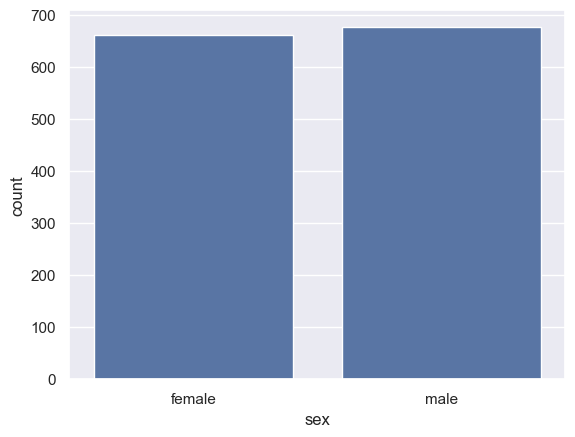

In [55]:
sns.countplot(x='sex', data=df)

We can see there are almost same numbers of male and femals,so cannot give importance or differentiate from both category

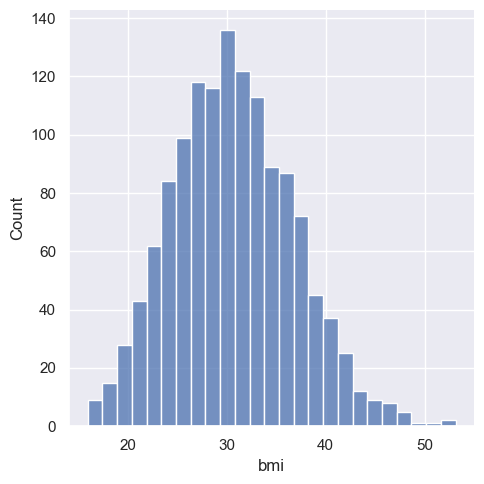

In [56]:
# distrubution for bmi 

sns.displot(df['bmi'])
plt.show()

It is looking like normal distribution , most of the bmi is between 22 to 39.

In [57]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

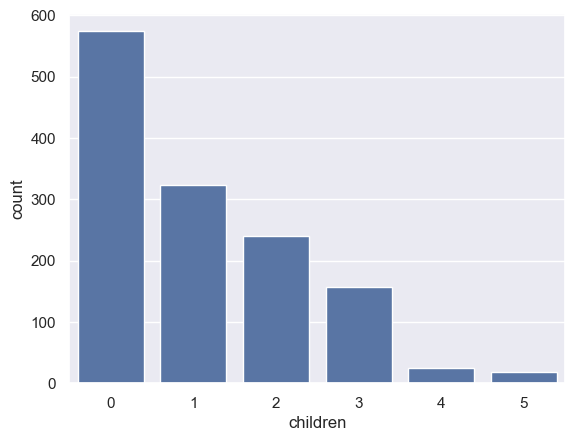

In [58]:
sns.countplot(x='children',data=df)
plt.show()

from above countplot we can say that there are most numbers of people who doesn't have children.

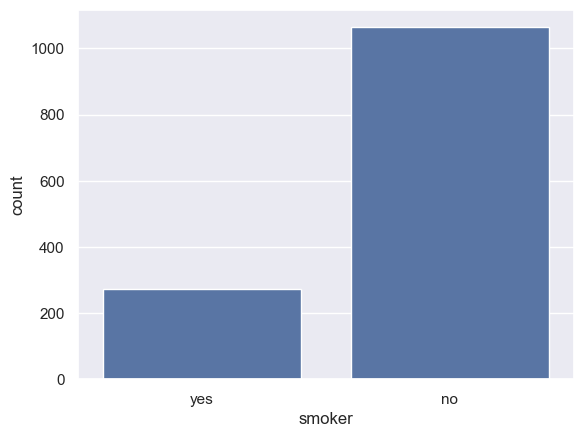

In [59]:
sns.countplot(x='smoker',data = df)
plt.show()

from above countplot no smokers are in more numbers.

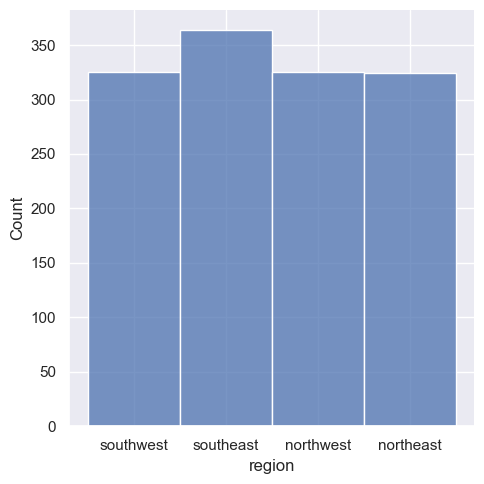

In [60]:
sns.displot(data=df['region'])
plt.show()

almost all categories are same

<Figure size 600x600 with 0 Axes>

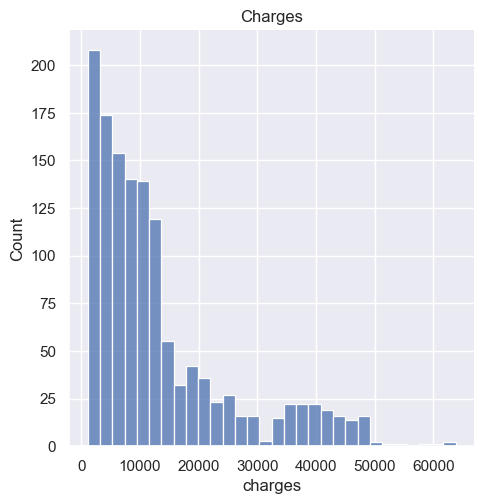

In [61]:
plt.figure(figsize=(6,6))
sns.displot(data=df['charges'])
plt.title("Charges")
plt.show()

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


missing values

In [63]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As per above there are no missing values

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


+ There are 1338 rows and 7 columns in dataset
+ there are 3 object/text columns
+ there are 4 numeric columsn 

In [65]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
df.shape

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encoding

In [67]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [68]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

C:\Users\Sudhir Kusmude\AppData\Local\Temp\ipykernel_35364\2355091573.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Sudhir Kusmude\AppData\Local\Temp\ipykernel_35364\2355091573.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\Sudhir Kusmude\AppData\Local\Temp\ipykernel_35364\2355091573.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


<Axes: >

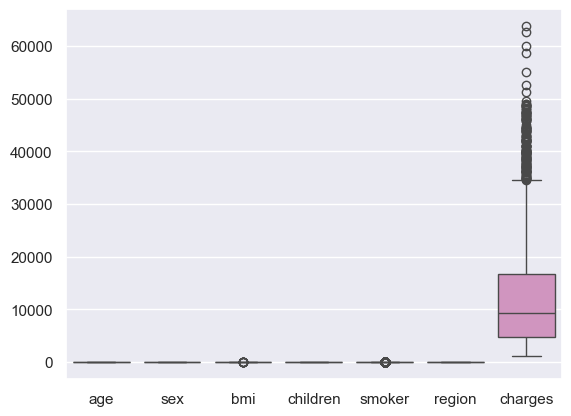

In [70]:
sns.boxplot(df)

In [71]:
x=df.drop('charges',axis=1)
y = df['charges']

In [72]:
x.shape

(1338, 6)

In [73]:
y.shape

(1338,)

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [76]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred=lr.predict(x_test)

In [78]:
#testing accuracy
r2_score(y_test,y_pred)

0.7833463107364539

In [79]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>

In [80]:
# Training accuracy
y_pred_train= lr.predict(x_train)


In [82]:
r2_score(y_train, y_pred_train)


0.7417049283233981